#### Importing the required libraries

In [1]:
import gzip
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Opening the json.gz files, and reading the dataset

In [2]:
with gzip.open('/content/receipts.json.gz', 'rb') as f:
    file_contents = f.read()

decoded_contents = file_contents.decode('utf-8')
data = []
decoder = json.JSONDecoder()

# Parse each JSON object in the file
while decoded_contents:
    obj, idx = decoder.raw_decode(decoded_contents)
    data.append(obj)
    decoded_contents = decoded_contents[idx:].lstrip()

# Create a DataFrame from the parsed JSON objects
receipts = pd.DataFrame(data)

In [3]:
receipts

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,{'$oid': '603cc0630a720fde100003e6'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614594147000},{'$date': 1614594147000},NaN,{'$date': 1614594148000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
1115,{'$oid': '603d0b710a720fde1000042a'},NaN,NaN,{'$date': 1614613361873},{'$date': 1614613361873},NaN,{'$date': 1614613361873},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1116,{'$oid': '603cf5290a720fde10000413'},NaN,NaN,{'$date': 1614607657664},{'$date': 1614607657664},NaN,{'$date': 1614607657664},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1117,{'$oid': '603ce7100a7217c72c000405'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614604048000},{'$date': 1614604048000},NaN,{'$date': 1614604049000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33


In [4]:
receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      1119 non-null   object 
 1   bonusPointsEarned        544 non-null    float64
 2   bonusPointsEarnedReason  544 non-null    object 
 3   createDate               1119 non-null   object 
 4   dateScanned              1119 non-null   object 
 5   finishedDate             568 non-null    object 
 6   modifyDate               1119 non-null   object 
 7   pointsAwardedDate        537 non-null    object 
 8   pointsEarned             609 non-null    object 
 9   purchaseDate             671 non-null    object 
 10  purchasedItemCount       635 non-null    float64
 11  rewardsReceiptItemList   679 non-null    object 
 12  rewardsReceiptStatus     1119 non-null   object 
 13  totalSpent               684 non-null    object 
 14  userId                  

##### In the above output, we can see that there are a lot of missing values in `bonusPointsEarned`, `bonusPointsEarnedReason`, `finishedDate`, `pointsAwardedDate`, `pointsEarned`, `purchaseDate`, `purchasedItemCount`, `rewardsReceiptItemList`,  and totalSpent features. Let us dig deeper into it.

#### Checking for null values

In [5]:
receipts.isnull().sum()

_id                          0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64

#### Checking the percentage of null values

In [6]:
(receipts.isnull().sum()/receipts.shape[0]) * 100

_id                         0.000000
bonusPointsEarned          51.385165
bonusPointsEarnedReason    51.385165
createDate                  0.000000
dateScanned                 0.000000
finishedDate               49.240393
modifyDate                  0.000000
pointsAwardedDate          52.010724
pointsEarned               45.576408
purchaseDate               40.035746
purchasedItemCount         43.252904
rewardsReceiptItemList     39.320822
rewardsReceiptStatus        0.000000
totalSpent                 38.873995
userId                      0.000000
dtype: float64

#### Checking for duplicated values

##### To inspect the duplicate rows in the dataset, we have to first change the data type of few feature such as `_id`, `createDate`, `dateScanned`, `finishedDate`, `modifyDate`, `pointsAwardedDate`, `purchaseDate`, and `rewardsReceiptItemList`. The data types of these feature is dictionary, annd it should be changed into string format. Also, the `rewardsReceiptItemList` feature is in list format, so that should be changed into string format.

In [7]:
dict_columns = ['_id', 'createDate', 'dateScanned', 'finishedDate', 'modifyDate', 'pointsAwardedDate', 'purchaseDate', 'rewardsReceiptItemList']  # Specify the columns that contain dictionaries
for column in dict_columns:
    receipts[column] = receipts[column].apply(json.dumps)

In [8]:
receipts.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1114    False
1115    False
1116    False
1117    False
1118    False
Length: 1119, dtype: bool

In [9]:
duplicates = receipts.duplicated()
duplicated_rows = receipts[duplicates]
duplicated_rows

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId


#### Checking for outliers

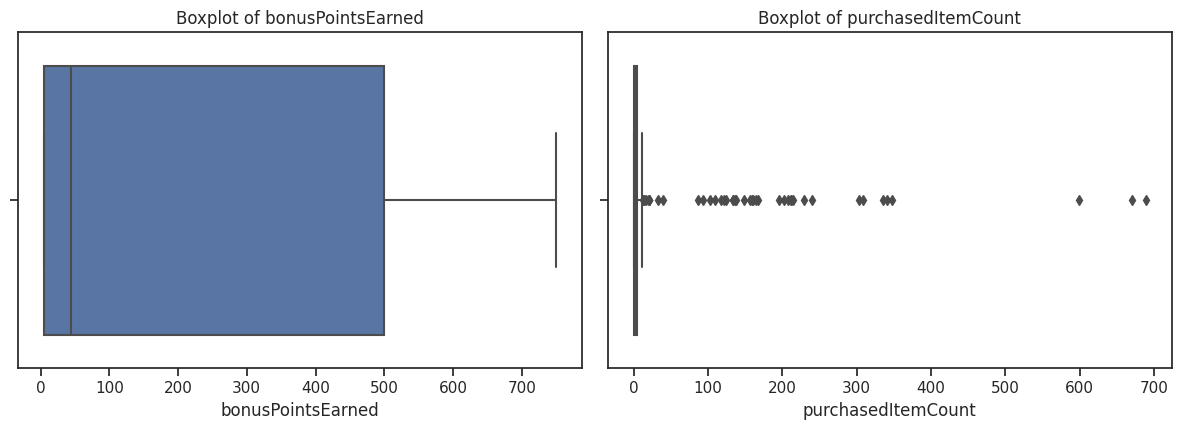

In [10]:
sns.set(style="ticks")
plt.figure(figsize=(12, 8))

num_cols = receipts.select_dtypes(include='number').columns
num_plots = len(num_cols)

for i, column in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=receipts[column])
    plt.title(f'Boxplot of {column}')

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.tight_layout()
plt.show()

## Data quality issues found in the dataset are:

1. We can observe that there are a lot of missing values in the the receipts dataset. The highest number of missing values are observed in `pointsAwardedDate` feature with 52%. It is followed by `bonusPointsEarned` and `bonusPointsEarnedReason` with 51% each. There are missing values in other features too.

2. While checking for duplicated values, we were not able to find any.

3. Also, we can observe that there are some outliers in the `purchasedItemCount` feature.